In [ ]:
import qiskit
import qiskit_aer
import qiskit_machine_learning
import numpy as np
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import backend_sampler_v2 as Sampler
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [2]:
data = np.loadtxt("seeds_dataset.txt")

X = data[:, [0, 3, 4, 2]]
y = data[:, 7].astype(int)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_angles = np.pi * (X_scaled - X_scaled.min()) / (X_scaled.max() - X_scaled.min())

X_train, X_test, y_train, y_test = train_test_split(
    X_angles, y, test_size=0.2, random_state=42, stratify=y
)

In [3]:
num_features = X_angles.shape[1]

feature_map = ZZFeatureMap(
    feature_dimension=num_features,
    reps=2,
    entanglement="full"
)

qkernel = FidelityQuantumKernel(feature_map=feature_map)


/tmp/ipykernel_8415/1847953683.py:3: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  feature_map = ZZFeatureMap(


In [ ]:

qsvm = SVC(kernel=qkernel.evaluate)
qsvm.fit(X_train, y_train)
y_pred = qsvm.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7380952380952381
Accuracy: 0.7380952380952381


In [21]:
print(X_test)
print(y_test)

[[1.54477239 1.18819468 1.79438583 2.56443309]
 [1.08484821 1.36603294 0.96658281 0.95802351]
 [1.81986722 2.07597454 1.61889159 1.1803273 ]
 [0.79470913 0.75065612 0.94009312 1.34705515]
 [2.40659292 2.15924801 2.48642915 2.71792857]
 [1.33630208 1.54104836 1.35730584 1.40792405]
 [2.98042355 2.98351421 2.87715217 2.0589566 ]
 [1.86499997 1.72876652 1.95497961 2.22833092]
 [2.66664351 2.70546551 2.56258703 1.84988517]
 [2.4388306  2.33990909 2.50960763 2.22303797]
 [1.06980396 0.91720306 1.13048781 1.54289421]
 [1.09344492 1.11621253 1.08578645 1.31794394]
 [2.24540454 1.89390204 2.37881476 2.40829114]
 [2.54414034 2.39213144 2.60232157 2.27861392]
 [0.95589751 1.01317926 0.97982766 0.98978119]
 [1.3642414  1.505763   1.34406099 1.38410579]
 [0.91291394 1.02588199 0.68678539 0.55575949]
 [1.42656757 1.4577749  1.42518568 1.75461211]
 [0.82264845 0.84239808 0.76791009 0.8177604 ]
 [1.80482297 2.01528371 1.89206658 1.95574412]
 [1.58775595 1.78663452 1.42353008 1.20943852]
 [1.15147274 

In [6]:
## 100 Samples , 5 Features  , 3 Reps

data = np.loadtxt("seeds_dataset.txt")

X = data[:100, [0, 1, 3, 4, 2]]
y = data[:100, 7].astype(int)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_angles = np.pi * (X_scaled - X_scaled.min()) / (X_scaled.max() - X_scaled.min())

X_train, X_test, y_train, y_test = train_test_split(
    X_angles, y, test_size=0.2, random_state=42, stratify=y
)

num_features = X_angles.shape[1]

feature_map = ZZFeatureMap(
    feature_dimension=num_features,
    reps=3,
    entanglement="full"
)

qkernel = FidelityQuantumKernel(feature_map=feature_map)

qsvm = SVC(kernel=qkernel.evaluate)
qsvm.fit(X_train, y_train)
y_pred = qsvm.predict(X_test)
print(accuracy_score(y_test,y_pred))


/tmp/ipykernel_8415/822108483.py:19: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  feature_map = ZZFeatureMap(


0.8


In [9]:
## 100 Samples , 2 Features , 3 Reps + Graph

data = np.loadtxt("seeds_dataset.txt")

X = data[:100, [0, 1]]
y = data[:100, 7].astype(int)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_angles = np.pi * (X_scaled - X_scaled.min()) / (X_scaled.max() - X_scaled.min())

X_train, X_test, y_train, y_test = train_test_split(
    X_angles, y, test_size=0.2, random_state=42, stratify=y
)

num_features = X_angles.shape[1]

feature_map = ZZFeatureMap(
    feature_dimension=num_features,
    reps=2,
    entanglement="full"
)

qkernel = FidelityQuantumKernel(feature_map=feature_map)

qsvm = SVC(kernel=qkernel.evaluate)
qsvm.fit(X_train, y_train)
y_pred = qsvm.predict(X_test)
print(accuracy_score(y_test,y_pred))



/tmp/ipykernel_8415/3664302841.py:19: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  feature_map = ZZFeatureMap(


0.7


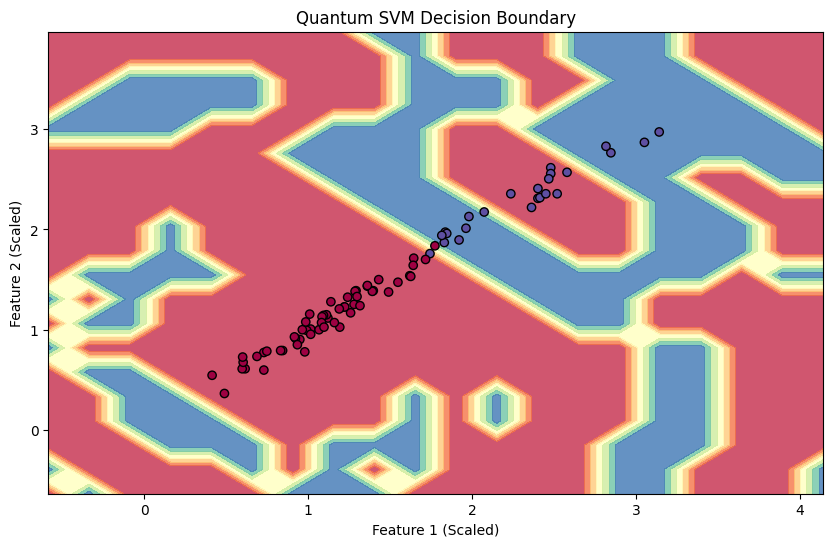

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

plt.figure(figsize=(10, 6))

DecisionBoundaryDisplay.from_estimator(
    qsvm,
    X_train,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8,
    ax=plt.gca(),
    grid_resolution=20  
)

plt.scatter(
    X_train[:, 0], 
    X_train[:, 1], 
    c=y_train, 
    edgecolors="k", 
    cmap=plt.cm.Spectral
)

plt.show()